In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt as r

In [5]:
from scipy import stats 

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
0,0,male,group C,some college,standard,none,61,62,61
1,1,female,group C,associate's degree,standard,none,62,53,53
2,2,female,group C,some college,free/reduced,completed,75,70,67
3,3,male,group C,some high school,free/reduced,none,76,65,79
4,4,male,group A,high school,free/reduced,none,58,44,53


In [8]:
train.skew()

Unnamed: 0       0.000000
reading score   -0.228772
writing score   -0.252597
math score      -0.240293
dtype: float64

In [9]:
test.skew()

Unnamed: 0       0.000000
reading score   -0.340062
writing score   -0.385856
dtype: float64

In [10]:
train['gender_lunch'] = train['gender'] + train['lunch']
train['eth_lunch'] = train['lunch'] + train['ethnicity']

In [11]:
test['gender_lunch'] = test['gender'] + test['lunch']
test['eth_lunch'] = test['lunch'] + test['ethnicity']

In [12]:
train['gen_test'] = train['gender']+train['test preparation course']

In [13]:
test['gen_test'] = test['gender']+test['test preparation course']

In [14]:
train['geneth'] = train['gender']+train['ethnicity']
train['genp'] = train['gender'] + train['parental level of education']
train['testeth'] = train['ethnicity'] + train['test preparation course']
train['ethp'] = train['parental level of education'] + train['ethnicity']
train['lunchp'] = train['parental level of education'] + train['lunch']
train['testp'] = train['parental level of education'] + train['test preparation course']

In [15]:
test['geneth'] = test['gender']+test['ethnicity']
test['genp'] = test['gender'] + test['parental level of education']
test['testeth'] = test['ethnicity'] + test['test preparation course']
test['ethp'] = test['parental level of education'] + test['ethnicity']
test['lunchp'] = test['parental level of education'] + test['lunch']
test['testp'] = test['parental level of education'] + test['test preparation course']

In [16]:
w_r = train[['reading score','writing score']]
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False,  
                        include_bias=False)
res = pf.fit_transform(w_r)

In [17]:
pd.DataFrame(pf.powers_, columns=['reading score',  
                                  'writing score'])

,reading score,writing score
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [18]:
intr_features = pd.DataFrame(res, columns=['reading score', 'writing score',  
                                           'reading score ^2', 
                                           'reading score x writing score',  
                                           'writing score ^2'])
intr_features.head(5)

,reading score,writing score,reading score ^2,reading score x writing score,writing score ^2
0,61.0,62.0,3721.0,3782.0,3844.0
1,62.0,53.0,3844.0,3286.0,2809.0
2,75.0,70.0,5625.0,5250.0,4900.0
3,76.0,65.0,5776.0,4940.0,4225.0
4,58.0,44.0,3364.0,2552.0,1936.0


In [19]:
train['reading score ^2'] = train['reading score'] * train['reading score']
train['writing score ^2'] = train['writing score'] * train['writing score']
train['reading score x writing score'] = train['reading score']*train['writing score']
train['reading score ^3'] = train['reading score'] * train['reading score']* train['reading score']
train['writing score ^3'] = train['writing score'] * train['writing score']* train['reading score']

In [20]:
train['zread'] = stats.zscore(train['reading score'])
train['zwrite'] = stats.zscore(train['writing score'])

In [21]:
test['zread'] = stats.zscore(test['reading score'])
test['zwrite'] = stats.zscore(test['writing score'])

In [22]:
#IQ = (zscore*15)+100
#Source:https://pumpkinperson.com/2016/11/21/simple-formula-for-converting-1970-to-1994-sat-into-iq-equivalents/
train['readiq'] = (train['zread']*15)+100
train['writeiq'] = (train['zwrite']*15)+100

In [23]:
test['readiq'] = (test['zread']*15)+100
test['writeiq'] = (test['zwrite']*15)+100

In [24]:
train['avg'] = (train['reading score']+train['writing score'])/2

In [25]:
train['zavg'] = stats.zscore(train['avg'])
train['avgiq'] = (train['zavg']*15)+100

In [26]:
#iq = attained score/expected mean score for age
#iq = mental age/chronological age
train['readexpmean'] = train['reading score']/train['readiq']

In [27]:
train['readexpmean']

0      0.670308
1      0.673686
2      0.711603
3      0.714125
4      0.659700
         ...   
695    0.726039
696    0.736903
697    0.666853
698    0.716599
699    0.706408
Name: readexpmean, Length: 700, dtype: float64

In [28]:
train['writeexpmean'] = train['writing score']/train['writeiq']

In [29]:
train['writeexpmean']

0      0.662436
1      0.625589
2      0.689779
3      0.673213
4      0.580119
         ...   
695    0.715868
696    0.723656
697    0.666103
698    0.701916
699    0.683350
Name: writeexpmean, Length: 700, dtype: float64

In [30]:
train['avgexpmean'] = (train['writeexpmean']+train['readexpmean'])/2

In [31]:
test['satread'] = (test['zread']*100)+500

In [32]:
train['satread'] = (train['zread']*100)+500

In [33]:
train['satread'].min()

179.57502106016102

In [34]:
train['satread'].max()

707.3176833121112

In [35]:
test['satread'].min()

149.77818632629834

In [36]:
test['satread'].max()

721.878373984579

In [37]:
rsat_bin = pd.IntervalIndex.from_tuples([(148,200),(200,250),(250, 300), (300, 350), (350,400), (400, 450), (450,500),(500,550),(550,600),(600,650),(650,700),(700,750)])
train['satread_bins'] = pd.cut(train['satread'], bins= rsat_bin)

In [38]:
test['satread_bins'] = pd.cut(test['satread'], bins= rsat_bin)

In [39]:
test['satread_bins'].isna().sum()

0

In [40]:
train['satwrite'] = (train['zwrite']*100)+500

In [41]:
test['satwrite'] = (test['zwrite']*100)+500

In [42]:
train['satwrite'].min()

148.35480794631286

In [43]:
train['satwrank'] = train[['satwrite']].rank(method = 'first')

In [44]:
train['satrrank'] = train[['satread']].rank(method = 'first')

In [45]:
test['satrrank'] = test[['satread']].rank(method = 'first')

In [46]:
train['satwrite'].max()

707.073268937404

In [47]:
test['satwrite'].min()

121.8388308205765

In [48]:
test['satwrite'].max()

718.7259796481478

In [49]:
test['satwrank'] = test[['satwrite']].rank(method = 'first')

In [50]:
wsat_bin = pd.IntervalIndex.from_tuples([(100,200), (200, 300),(300,400), (400, 500),(500,600),(600,700),(700,800)])
train['satwrite_bins'] = pd.cut(train['satwrite'], bins= wsat_bin)

In [51]:
train['writerank'] = train['writing score'].rank(method = 'first')

In [52]:
test['satwrite_bins'] = pd.cut(test['satwrite'], bins= wsat_bin)

In [53]:
train['readrank'] = train[['reading score']].rank(method = 'first')

In [54]:
train['avgrank'] = train['avg'].rank(method = 'first')

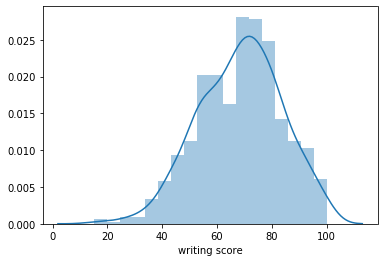

In [55]:
sns.distplot(train['writing score'])

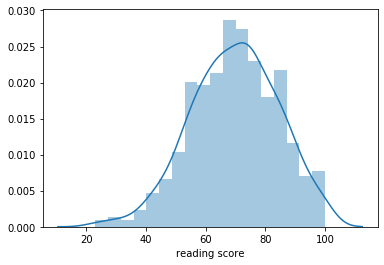

In [56]:
sns.distplot(train['reading score'])

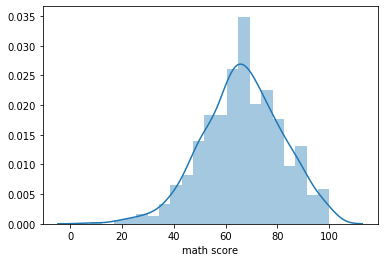

In [57]:
sns.distplot(train['math score'])

In [58]:
train['reading score'].mean()

69.75142857142858

In [59]:
train['read_meandev'] = train['reading score'] - 69.75142857142858

In [60]:
train['writing score'].mean()

68.49714285714286

In [61]:
train['write_meandev'] = train['writing score'] - 68.49714285714286

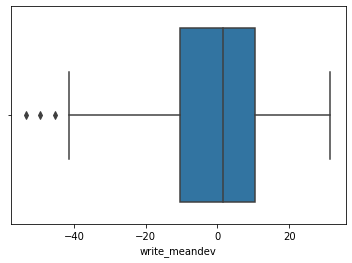

In [62]:
sns.boxplot(train['write_meandev'])

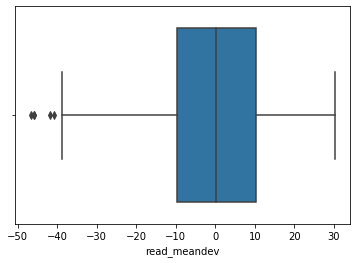

In [63]:
sns.boxplot(train['read_meandev'])

In [64]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,gender_lunch,...,satread_bins,satwrite,satwrank,satrrank,satwrite_bins,writerank,readrank,avgrank,read_meandev,write_meandev
0,0,male,group C,some college,standard,none,61,62,61,malestandard,...,"(400, 450]",457.293251,222.0,187.0,"(400, 500]",222.0,187.0,206.0,-8.751429,-6.497143
1,1,female,group C,associate's degree,standard,none,62,53,53,femalestandard,...,"(400, 450]",398.134826,108.0,202.0,"(300, 400]",108.0,202.0,158.0,-7.751429,-15.497143
2,2,female,group C,some college,free/reduced,completed,75,70,67,femalefree/reduced,...,"(500, 550]",509.878518,347.0,434.0,"(500, 600]",347.0,434.0,400.0,5.248571,1.502857
3,3,male,group C,some high school,free/reduced,none,76,65,79,malefree/reduced,...,"(500, 550]",477.012726,265.0,453.0,"(400, 500]",265.0,453.0,356.0,6.248571,-3.497143
4,4,male,group A,high school,free/reduced,none,58,44,53,malefree/reduced,...,"(400, 450]",338.976401,40.0,143.0,"(300, 400]",40.0,143.0,75.0,-11.751429,-24.497143


In [65]:
train[train['avg']<30]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,gender_lunch,...,satread_bins,satwrite,satwrank,satrrank,satwrite_bins,writerank,readrank,avgrank,read_meandev,write_meandev
140,140,male,group B,high school,free/reduced,none,24,15,30,malefree/reduced,...,"(148, 200]",148.354808,1.0,2.0,"(100, 200]",1.0,2.0,1.0,-45.751429,-53.497143
152,152,male,group C,some college,free/reduced,none,28,27,35,malefree/reduced,...,"(200, 250]",227.232708,4.0,4.0,"(200, 300]",4.0,4.0,4.0,-41.751429,-41.497143
286,286,female,group B,high school,free/reduced,none,24,23,8,femalefree/reduced,...,"(148, 200]",200.940075,3.0,3.0,"(200, 300]",3.0,3.0,3.0,-45.751429,-45.497143
497,497,female,group C,high school,standard,none,29,30,29,femalestandard,...,"(200, 250]",246.952183,7.0,5.0,"(200, 300]",7.0,5.0,5.0,-40.751429,-38.497143
623,623,male,group A,some college,free/reduced,none,23,19,28,malefree/reduced,...,"(148, 200]",174.647441,2.0,1.0,"(100, 200]",2.0,1.0,2.0,-46.751429,-49.497143


In [66]:
train = train.drop(train.index[286])

In [67]:
mean = np.mean(train['avg']) 
std = np.std(train['avg']) 

In [68]:
threshold = 2
outlier = [] 
for i in train['avg']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier)

outlier in dataset is [98.5, 99.5, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.5, 99.5, 100.0, 100.0]


In [69]:
train[train['avg']>97]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,gender_lunch,...,satread_bins,satwrite,satwrank,satrrank,satwrite_bins,writerank,readrank,avgrank,read_meandev,write_meandev
69,69,female,group D,master's degree,free/reduced,completed,95,100,85,femalefree/reduced,...,"(650, 700]",707.073269,690.0,672.0,"(700, 800]",690.0,672.0,685.0,25.248571,31.502857
129,129,female,group A,some high school,standard,completed,100,97,92,femalestandard,...,"(700, 750]",687.353794,684.0,688.0,"(600, 700]",684.0,688.0,689.0,30.248571,28.502857
134,134,female,group E,master's degree,standard,completed,99,100,94,femalestandard,...,"(700, 750]",707.073269,691.0,686.0,"(700, 800]",691.0,686.0,690.0,29.248571,31.502857
197,197,female,group E,bachelor's degree,standard,none,100,100,100,femalestandard,...,"(700, 750]",707.073269,692.0,689.0,"(700, 800]",692.0,689.0,693.0,30.248571,31.502857
222,222,female,group D,master's degree,standard,none,100,100,92,femalestandard,...,"(700, 750]",707.073269,693.0,690.0,"(700, 800]",693.0,690.0,694.0,30.248571,31.502857
242,242,female,group E,bachelor's degree,standard,completed,100,100,99,femalestandard,...,"(700, 750]",707.073269,694.0,691.0,"(700, 800]",694.0,691.0,695.0,30.248571,31.502857
302,302,male,group E,bachelor's degree,standard,completed,100,100,100,malestandard,...,"(700, 750]",707.073269,695.0,693.0,"(700, 800]",695.0,693.0,696.0,30.248571,31.502857
388,388,female,group C,associate's degree,standard,completed,96,99,96,femalestandard,...,"(650, 700]",700.500111,688.0,680.0,"(700, 800]",688.0,680.0,686.0,26.248571,30.502857
389,389,female,group E,associate's degree,standard,none,100,100,100,femalestandard,...,"(700, 750]",707.073269,696.0,694.0,"(700, 800]",696.0,694.0,697.0,30.248571,31.502857
398,398,female,group D,some high school,standard,completed,100,100,97,femalestandard,...,"(700, 750]",707.073269,697.0,695.0,"(700, 800]",697.0,695.0,698.0,30.248571,31.502857


In [70]:
test[test['reading score']>99]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,gender_lunch,eth_lunch,...,zread,zwrite,readiq,writeiq,satread,satread_bins,satwrite,satrrank,satwrank,satwrite_bins
133,133,female,group D,bachelor's degree,standard,none,100,100,femalestandard,standardgroup D,...,2.218784,2.187260,133.281756,132.808897,721.878374,"(700, 750]",718.72598,297.0,298.0,"(700, 800]"
190,190,female,group C,bachelor's degree,standard,completed,100,99,femalestandard,standardgroup C,...,2.218784,2.120939,133.281756,131.814085,721.878374,"(700, 750]",712.09390,298.0,296.0,"(700, 800]"
256,256,female,group D,bachelor's degree,free/reduced,completed,100,100,femalefree/reduced,free/reducedgroup D,...,2.218784,2.187260,133.281756,132.808897,721.878374,"(700, 750]",718.72598,299.0,299.0,"(700, 800]"
298,298,female,group D,master's degree,standard,none,100,100,femalestandard,standardgroup D,...,2.218784,2.187260,133.281756,132.808897,721.878374,"(700, 750]",718.72598,300.0,300.0,"(700, 800]"


In [71]:
test[test['writing score']>99]

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,gender_lunch,eth_lunch,...,zread,zwrite,readiq,writeiq,satread,satread_bins,satwrite,satrrank,satwrank,satwrite_bins
133,133,female,group D,bachelor's degree,standard,none,100,100,femalestandard,standardgroup D,...,2.218784,2.18726,133.281756,132.808897,721.878374,"(700, 750]",718.72598,297.0,298.0,"(700, 800]"
256,256,female,group D,bachelor's degree,free/reduced,completed,100,100,femalefree/reduced,free/reducedgroup D,...,2.218784,2.18726,133.281756,132.808897,721.878374,"(700, 750]",718.72598,299.0,299.0,"(700, 800]"
298,298,female,group D,master's degree,standard,none,100,100,femalestandard,standardgroup D,...,2.218784,2.18726,133.281756,132.808897,721.878374,"(700, 750]",718.72598,300.0,300.0,"(700, 800]"


In [72]:
#train = train.drop(train.index[432])

In [73]:
#train.loc[432,'math score'] = 'NaN'

In [74]:
#train = train.drop(train.index[450])

In [75]:
#train.loc[450,'math score'] = 'NaN'

In [76]:
#train.isna().sum()

In [77]:
train['Reading_AvgStatus'] = np.where(train['reading score']<=69.75142857142858, 'F', 'P')

In [78]:
train['Reading_AvgStatus'].value_counts()

P    364
F    335
Name: Reading_AvgStatus, dtype: int64

In [79]:
train['Writing_AvgStatus'] = np.where(train['writing score']<=68.49714285714286, 'F', 'P')

In [80]:
train['ReadCourse_Avg'] = train.apply(lambda x : 'CompleteFail' if x['Reading_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [81]:
train['WriteCourse_Avg'] = train.apply(lambda x : 'CompleteFail' if x['Writing_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [82]:
train['OverAll_PassStatus'] = train.apply(lambda x : 'F' if x['Reading_AvgStatus'] == 'F' or x['Writing_AvgStatus'] == 'F' else 'P', axis =1)

In [83]:
train['ReadCourse_Avg'].value_counts()

IncompleteFail    252
IncompletePass    203
CompletePass      161
CompleteFail       83
Name: ReadCourse_Avg, dtype: int64

In [84]:
train['WriteCourse_Avg'].value_counts()

IncompleteFail    258
IncompletePass    197
CompletePass      172
CompleteFail       72
Name: WriteCourse_Avg, dtype: int64

In [85]:
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,gender_lunch,...,writerank,readrank,avgrank,read_meandev,write_meandev,Reading_AvgStatus,Writing_AvgStatus,ReadCourse_Avg,WriteCourse_Avg,OverAll_PassStatus
0,0,male,group C,some college,standard,none,61,62,61,malestandard,...,222.0,187.0,206.0,-8.751429,-6.497143,F,F,IncompleteFail,IncompleteFail,F
1,1,female,group C,associate's degree,standard,none,62,53,53,femalestandard,...,108.0,202.0,158.0,-7.751429,-15.497143,F,F,IncompleteFail,IncompleteFail,F
2,2,female,group C,some college,free/reduced,completed,75,70,67,femalefree/reduced,...,347.0,434.0,400.0,5.248571,1.502857,P,P,CompletePass,CompletePass,P
3,3,male,group C,some high school,free/reduced,none,76,65,79,malefree/reduced,...,265.0,453.0,356.0,6.248571,-3.497143,P,F,IncompletePass,IncompleteFail,F
4,4,male,group A,high school,free/reduced,none,58,44,53,malefree/reduced,...,40.0,143.0,75.0,-11.751429,-24.497143,F,F,IncompleteFail,IncompleteFail,F


In [86]:
train['rwr'] = train['writing score ^2']/train['reading score ^2']

In [87]:
train['Ethinicity_Gen'] = train.apply(lambda x : 'GroupAMale' if x['ethnicity'] == 'group A' and  x['gender'] == 'male' else ('GroupAFemale' if x['ethnicity'] == 'group A' and  x['gender'] == 'female' else ('GroupBMale' if x['ethnicity'] == 'group B' and  x['gender'] == 'male'else ('GroupBFemale' if x['ethnicity'] == 'group B' and  x['gender'] == 'female' else ('GroupCMale' if x['ethnicity'] == 'group C' and  x['gender'] == 'male' else ('GroupCFemale' if x['ethnicity'] == 'group C' and  x['gender'] == 'female' else ('GroupDMale' if x['ethnicity'] == 'group D' and  x['gender'] == 'male' else ('GroupDFemale' if x['ethnicity'] == 'group D' and  x['gender'] == 'female' else ('GroupEFemale' if x['ethnicity'] == 'group E' and  x['gender'] == 'female' else 'GroupEMale')))))))), axis =1)

In [88]:
train['Ethinicity_lunch'] = train.apply(lambda x : 'GroupAstd' if x['ethnicity'] == 'group A' and  x['lunch'] == 'standard' else ('GroupAfree' if x['ethnicity'] == 'group A' and  x['lunch'] == 'free/reduced' else ('GroupBstd' if x['ethnicity'] == 'group B' and  x['lunch'] == 'standard'else ('GroupBfree' if x['ethnicity'] == 'group B' and  x['lunch'] == 'free/reduced' else ('GroupCstd' if x['ethnicity'] == 'group C' and  x['lunch'] == 'standard' else ('GroupCfree' if x['ethnicity'] == 'group C' and  x['lunch'] == 'free/reduced' else ('GroupDstd' if x['ethnicity'] == 'group D' and  x['lunch'] == 'standard' else ('GroupDfree' if x['ethnicity'] == 'group D' and  x['lunch'] == 'free/reduced' else ('GroupEstd' if x['ethnicity'] == 'group E' and  x['lunch'] == 'standard' else 'GroupEfree')))))))), axis =1)

In [89]:
train['Ethinicity_lunch'].value_counts()

GroupCstd     144
GroupDstd     119
GroupBstd      89
GroupCfree     75
GroupEstd      67
GroupDfree     65
GroupBfree     51
GroupAstd      35
GroupEfree     31
GroupAfree     23
Name: Ethinicity_lunch, dtype: int64

In [90]:
train['Ethinicity_Gen'].value_counts()

GroupCFemale    127
GroupDFemale     96
GroupCMale       92
GroupDMale       88
GroupBFemale     76
GroupBMale       64
GroupEMale       51
GroupEFemale     47
GroupAMale       38
GroupAFemale     20
Name: Ethinicity_Gen, dtype: int64

In [91]:
train['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           133
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

In [92]:
train['Parent Degree'] = train.apply(lambda x : 'Graduate' if x['parental level of education'] == "master's degree" or  x['parental level of education'] == "bachelor's degree" or x['parental level of education'] == "associate's degree" else ( 'NotGrad' ), axis =1)

In [93]:
def define_grades(avg):
    if avg <= 39:
        return 'F'
    elif avg >= 40 and avg <= 50:
        return 'E'
    elif avg >= 51 and avg <= 60:
        return 'D'
    elif avg >= 61 and avg <= 70:
        return 'C'
    elif avg >= 71 and avg <= 80:
        return 'B'
    elif avg >= 81 and avg <= 90:
        return 'A'
    elif avg >= 91 and avg <= 100:
        return 'A+'
    else:
        return ''

In [94]:
train['grades'] = train['avg'].apply(lambda x : define_grades(x))
train.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,gender_lunch,...,Reading_AvgStatus,Writing_AvgStatus,ReadCourse_Avg,WriteCourse_Avg,OverAll_PassStatus,rwr,Ethinicity_Gen,Ethinicity_lunch,Parent Degree,grades
0,0,male,group C,some college,standard,none,61,62,61,malestandard,...,F,F,IncompleteFail,IncompleteFail,F,1.033056,GroupCMale,GroupCstd,NotGrad,C
1,1,female,group C,associate's degree,standard,none,62,53,53,femalestandard,...,F,F,IncompleteFail,IncompleteFail,F,0.730749,GroupCFemale,GroupCstd,Graduate,D
2,2,female,group C,some college,free/reduced,completed,75,70,67,femalefree/reduced,...,P,P,CompletePass,CompletePass,P,0.871111,GroupCFemale,GroupCfree,NotGrad,B
3,3,male,group C,some high school,free/reduced,none,76,65,79,malefree/reduced,...,P,F,IncompletePass,IncompleteFail,F,0.731475,GroupCMale,GroupCfree,NotGrad,
4,4,male,group A,high school,free/reduced,none,58,44,53,malefree/reduced,...,F,F,IncompleteFail,IncompleteFail,F,0.575505,GroupAMale,GroupAfree,NotGrad,D


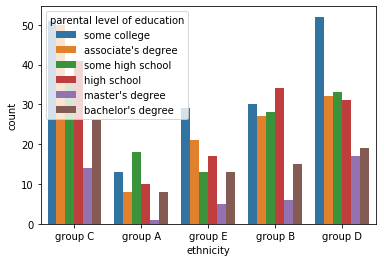

In [95]:
sns.countplot(x= 'ethnicity', hue= 'parental level of education', data= train)

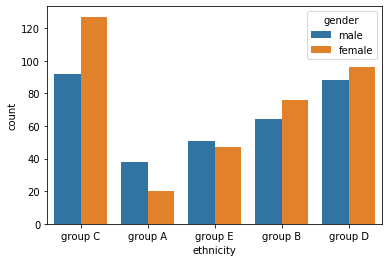

In [96]:
sns.countplot(x= 'ethnicity', hue= 'gender', data= train)

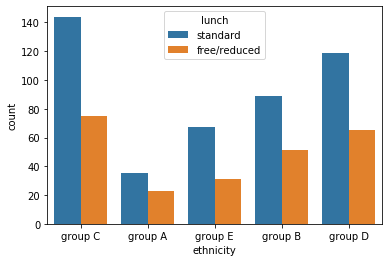

In [97]:
sns.countplot(x= 'ethnicity', hue= 'lunch', data= train)

In [98]:
#Approx calcs from graph
#Grp c - 70 free, 140 std - 1:2 free:std
#grp a - 25 free, 30 std - 5:6 free : Std
#grp e - 30 free, 70 std   3:7 free:std
#grp b - 50 free, 90 std
#grp d - 120 std, 70 free

In [99]:
train.isna().sum()

Unnamed: 0                       0
gender                           0
ethnicity                        0
parental level of education      0
lunch                            0
test preparation course          0
reading score                    0
writing score                    0
math score                       0
gender_lunch                     0
eth_lunch                        0
gen_test                         0
geneth                           0
genp                             0
testeth                          0
ethp                             0
lunchp                           0
testp                            0
reading score ^2                 0
writing score ^2                 0
reading score x writing score    0
reading score ^3                 0
writing score ^3                 0
zread                            0
zwrite                           0
readiq                           0
writeiq                          0
avg                              0
zavg                

In [100]:
train['ethnicity'].value_counts()

group C    219
group D    184
group B    140
group E     98
group A     58
Name: ethnicity, dtype: int64

In [101]:
train['test preparation course'].value_counts()

none         455
completed    244
Name: test preparation course, dtype: int64

In [102]:
train['parental level of education'].value_counts()

some college          175
associate's degree    138
high school           133
some high school      129
bachelor's degree      81
master's degree        43
Name: parental level of education, dtype: int64

In [103]:
train['lunch'].value_counts()

standard        454
free/reduced    245
Name: lunch, dtype: int64

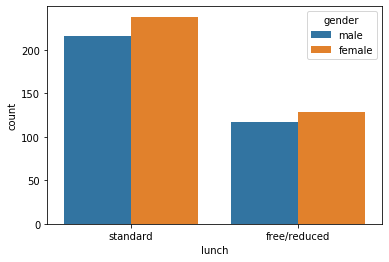

In [104]:
sns.countplot(x= 'lunch', hue= 'gender', data= train)

In [105]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [106]:
train.shape

(699, 53)

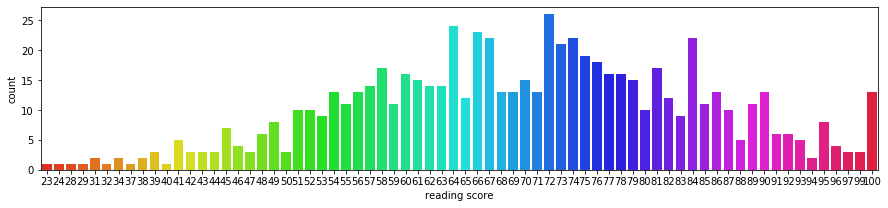

In [107]:
plt.figure(figsize = (15,3))
sns.countplot(train['reading score'], palette = 'hsv')

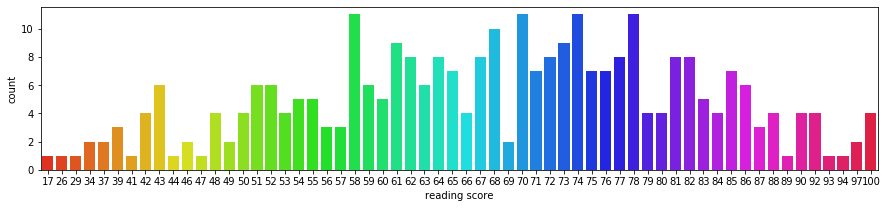

In [108]:
plt.figure(figsize = (15,3))
sns.countplot(test['reading score'], palette = 'hsv')

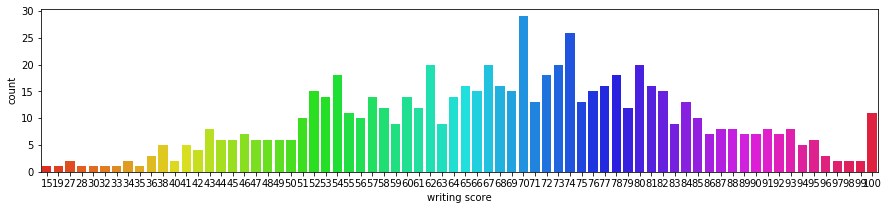

In [109]:
plt.figure(figsize = (15,3))
sns.countplot(train['writing score'], palette = 'hsv')

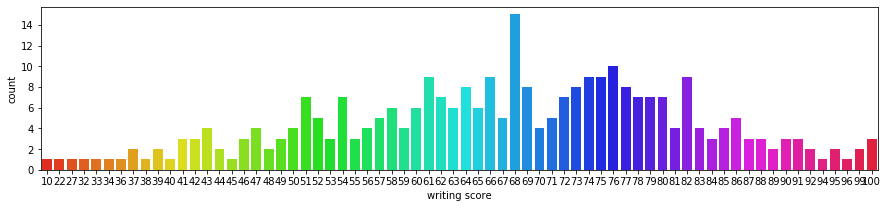

In [110]:
plt.figure(figsize = (15,3))
sns.countplot(test['writing score'], palette = 'hsv')

In [111]:
bins_read = pd.IntervalIndex.from_tuples([(15,30), (30, 45), (45, 60), (60, 75), (75, 90), (90, 100)])
train['reading score_bins'] = pd.cut(train['reading score'], bins=bins_read)
test['reading score_bins'] = pd.cut(test['reading score'], bins=bins_read)

In [112]:
bins_write = pd.IntervalIndex.from_tuples([(9,20), (20, 30), (30, 40), (40,50), (50, 60), (60,70),(70,80),(80,90),(90,100)])
train['write score_bins'] = pd.cut(train['writing score'], bins=bins_write)
test['write score_bins'] = pd.cut(test['writing score'], bins=bins_write)

In [113]:
avg_bin = pd.IntervalIndex.from_tuples([(10,20), (20, 30), (30, 40), (40,50), (50, 60), (60,70),(70,80),(80,90),(90,100)])
train['avg score_bins'] = pd.cut(train['avg'], bins= avg_bin)

In [114]:
train['tot'] = train['reading score'] + train['writing score']
train['mean'] = np.mean(train['tot'])

In [115]:
train['totmean'] = train['tot'] - train['mean']

In [116]:
train['totroot'] = np.sqrt(train['reading score']) + np.sqrt(train['writing score'])

In [117]:
train.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score,gender_lunch,eth_lunch,...,Ethinicity_lunch,Parent Degree,grades,reading score_bins,write score_bins,avg score_bins,tot,mean,totmean,totroot
0,male,group C,some college,standard,none,61,62,61,malestandard,standardgroup C,...,GroupCstd,NotGrad,C,"(60, 75]","(60, 70]","(60, 70]",123,138.379113,-15.379113,15.684258
1,female,group C,associate's degree,standard,none,62,53,53,femalestandard,standardgroup C,...,GroupCstd,Graduate,D,"(60, 75]","(50, 60]","(50, 60]",115,138.379113,-23.379113,15.154118
2,female,group C,some college,free/reduced,completed,75,70,67,femalefree/reduced,free/reducedgroup C,...,GroupCfree,NotGrad,B,"(60, 75]","(60, 70]","(70, 80]",145,138.379113,6.620887,17.026854
3,male,group C,some high school,free/reduced,none,76,65,79,malefree/reduced,free/reducedgroup C,...,GroupCfree,NotGrad,,"(75, 90]","(60, 70]","(70, 80]",141,138.379113,2.620887,16.780056
4,male,group A,high school,free/reduced,none,58,44,53,malefree/reduced,free/reducedgroup A,...,GroupAfree,NotGrad,D,"(45, 60]","(40, 50]","(50, 60]",102,138.379113,-36.379113,14.249023


In [118]:
train['readpercent'] = (train['reading score']/train['tot'])*100
train['writepercent'] = (train['writing score']/train['tot'])*100

In [119]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [120]:
train['test preparation course']= label_encoder.fit_transform(train['test preparation course']) 
train['gender']= label_encoder.fit_transform(train['gender'])
train['OverAll_PassStatus']= label_encoder.fit_transform(train['OverAll_PassStatus'])

In [121]:
train = pd.get_dummies(train, columns=['ethnicity', 'parental level of education','lunch','write score_bins','reading score_bins','Reading_AvgStatus','Writing_AvgStatus','grades','ReadCourse_Avg','WriteCourse_Avg','satread_bins','satwrite_bins','gender_lunch','eth_lunch'], drop_first=True)

In [122]:
train = pd.get_dummies(train, columns=['gen_test','geneth','genp','testeth','ethp','lunchp','testp'], drop_first=True)

In [123]:
train['readinglog'] = np.log(train['reading score'])

In [124]:
train['writinglog'] = np.log(train['writing score'])

In [125]:
#sns.distplot(train['readinglog'])

In [126]:
#from sklearn import preprocessing

In [127]:
scaler = preprocessing.MinMaxScaler() 
train['readingmm'] = scaler.fit_transform(train[['reading score']]) 

In [128]:
test['readingmm'] = scaler.fit_transform(test[['reading score']]) 

In [129]:
train['writingmm'] = scaler.fit_transform(train[['writing score']]) 

In [130]:
scaler2 = preprocessing.RobustScaler() 
train['readingrb'] = scaler2.fit_transform(train[['reading score']])
train['writingrb'] = scaler2.fit_transform(train[['writing score']]) 

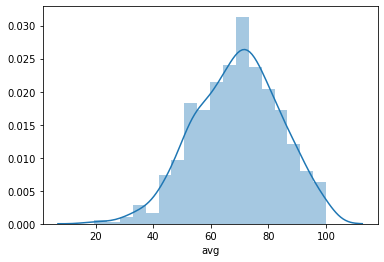

In [131]:
sns.distplot(train['avg'])

In [132]:
train['avg'].min()

19.5

In [133]:
train.loc[432]

gender                            1
test preparation course           0
reading score                   100
writing score                    95
math score                       87
                             ...   
writinglog                 4.553877
readingmm                  1.000000
writingmm                  0.941176
readingrb                  1.500000
writingrb                  1.190476
Name: 432, Length: 197, dtype: object

In [134]:
import scipy.stats as stats

In [135]:
train['Log_read']=np.log(train['reading score']+1)
train['Log_write']=np.log(train['writing score']+1)
train['sqr_read']= train['reading score']**(1/2)
train['sqr_write']= train['writing score']**(1/2)
train['Exp_read']= train['reading score']**(1/5)
train['Exp_write']= train['writing score']**(1/5)
train['read_boxcox'], param = stats.boxcox(train['reading score']+1)
train['write_boxcox'], param = stats.boxcox(train['writing score']+1)

In [136]:
test['write_boxcox'], param = stats.boxcox(test['writing score']+1)

In [137]:
test['Log_read']=np.log(test['reading score']+1)
test['read_boxcox'], param = stats.boxcox(test['reading score']+1)

In [138]:
train['ratio'] = (train['reading score']/train['writing score'])*100

In [139]:
train['reading score'].skew()

-0.20203586483836833

In [140]:
test['reading score'].skew()

-0.3400624111510655

In [141]:
read = train[['Log_read','sqr_read','Exp_read','read_boxcox','readingrb','readingmm','readinglog','reading score']]

In [142]:
read.skew()

Log_read        -0.946137
sqr_read        -0.539848
Exp_read        -0.781294
read_boxcox     -0.030965
readingrb       -0.202036
readingmm       -0.202036
readinglog      -0.963853
reading score   -0.202036
dtype: float64

In [143]:
train['recpw'] = 1/train['writing score']
train['recpr'] = 1/train['reading score']

In [144]:
train['Log_read_rank'] = train[['Log_read']].rank(method = 'first')
train['read_boxcox_rank'] = train[['read_boxcox']].rank(method = 'first')

In [145]:
train['logreadrn'] = scaler.fit_transform(train[['Log_read']]) 

In [146]:
train['logreadrn'].skew()

-0.9461371024708298

In [147]:
train['write_meandev'].skew()

-0.2312665113151814

In [148]:
from sklearn.preprocessing import QuantileTransformer
scalerq = QuantileTransformer()

In [149]:
train['readingq'] = scalerq.fit_transform(train[['reading score']]) 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (699). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [150]:
test['readingq'] = scalerq.fit_transform(test[['reading score']]) 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (300). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [151]:
train['mathq'] = scalerq.fit_transform(train[['math score']]) 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (699). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [152]:
train['readingqmm'] = scaler.fit_transform(train[['readingq']]) 

In [153]:
test['readingqmm'] = scaler.fit_transform(test[['readingq']]) 

In [154]:
train['writingq'] = scalerq.fit_transform(train[['writing score']]) 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (699). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [155]:
test['writingq'] = scalerq.fit_transform(test[['writing score']]) 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (300). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


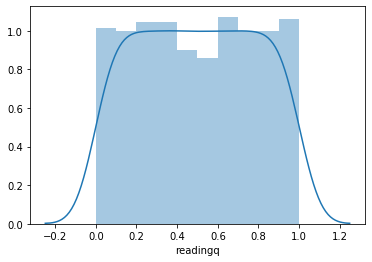

In [156]:
sns.distplot(train['readingq'])

In [157]:
train['readingqmmrank'] = train[['readingqmm']].rank(method = 'first')

In [158]:
test['readingqmmrank'] = test[['readingqmm']].rank(method = 'first')

In [159]:
from sklearn.preprocessing import MaxAbsScaler
scalermax = MaxAbsScaler()

In [160]:
train['writingmax'] = scalerq.fit_transform(train[['writing score']]) 
test['writingmax'] = scalerq.fit_transform(test[['writing score']]) 

C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (699). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
C:\Users\prana\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2370: UserWarning: n_quantiles (1000) is greater than the total number of samples (300). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [161]:
train['wnew'] = scaler.fit_transform(train[['writingmax']]) 
test['wnew'] = scaler.fit_transform(test[['writingmax']]) 

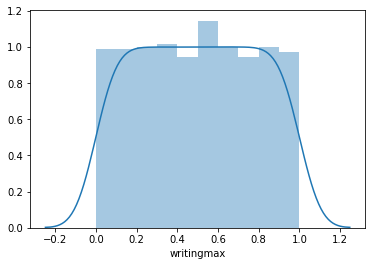

In [162]:
sns.distplot(train['writingmax'])

In [163]:
train.head()

,gender,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,writing score ^3,...,Log_read_rank,read_boxcox_rank,logreadrn,readingq,mathq,readingqmm,writingq,readingqmmrank,writingmax,wnew
0,1,1,61,62,61,3721,3844,3782,226981,234484,...,186.0,186.0,0.660429,0.275788,0.334527,0.275788,0.328797,186.0,0.328797,0.328797
1,0,1,62,53,53,3844,2809,3286,238328,174158,...,201.0,201.0,0.671563,0.295845,0.187679,0.295845,0.161175,201.0,0.161175,0.161175
2,0,0,75,70,67,5625,4900,5250,421875,367500,...,433.0,433.0,0.802106,0.631805,0.512894,0.631805,0.514327,433.0,0.514327,0.514327
3,1,1,76,65,79,5776,4225,4940,438976,321100,...,452.0,452.0,0.811202,0.659026,0.787249,0.659026,0.387536,452.0,0.387536,0.387536
4,1,1,58,44,53,3364,1936,2552,195112,112288,...,142.0,142.0,0.625916,0.213467,0.187679,0.213467,0.058023,142.0,0.058023,0.058023


In [164]:
#plt.figure(figsize=(30, 30))
#sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [165]:
train.columns

Index(['gender', 'test preparation course', 'reading score', 'writing score',
       'math score', 'reading score ^2', 'writing score ^2',
       'reading score x writing score', 'reading score ^3', 'writing score ^3',
       ...
       'Log_read_rank', 'read_boxcox_rank', 'logreadrn', 'readingq', 'mathq',
       'readingqmm', 'writingq', 'readingqmmrank', 'writingmax', 'wnew'],
      dtype='object', length=218)

In [166]:
print(train.columns.tolist())

['gender', 'test preparation course', 'reading score', 'writing score', 'math score', 'reading score ^2', 'writing score ^2', 'reading score x writing score', 'reading score ^3', 'writing score ^3', 'zread', 'zwrite', 'readiq', 'writeiq', 'avg', 'zavg', 'avgiq', 'readexpmean', 'writeexpmean', 'avgexpmean', 'satread', 'satwrite', 'satwrank', 'satrrank', 'writerank', 'readrank', 'avgrank', 'read_meandev', 'write_meandev', 'OverAll_PassStatus', 'rwr', 'Ethinicity_Gen', 'Ethinicity_lunch', 'Parent Degree', 'avg score_bins', 'tot', 'mean', 'totmean', 'totroot', 'readpercent', 'writepercent', 'ethnicity_group B', 'ethnicity_group C', 'ethnicity_group D', 'ethnicity_group E', "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_standard', 'write score_bins_(20, 30]', 'write score_bins_(30, 40]', 'write score_bi

In [167]:
y = train['math score']

In [168]:
train.head()

,gender,test preparation course,reading score,writing score,math score,reading score ^2,writing score ^2,reading score x writing score,reading score ^3,writing score ^3,...,Log_read_rank,read_boxcox_rank,logreadrn,readingq,mathq,readingqmm,writingq,readingqmmrank,writingmax,wnew
0,1,1,61,62,61,3721,3844,3782,226981,234484,...,186.0,186.0,0.660429,0.275788,0.334527,0.275788,0.328797,186.0,0.328797,0.328797
1,0,1,62,53,53,3844,2809,3286,238328,174158,...,201.0,201.0,0.671563,0.295845,0.187679,0.295845,0.161175,201.0,0.161175,0.161175
2,0,0,75,70,67,5625,4900,5250,421875,367500,...,433.0,433.0,0.802106,0.631805,0.512894,0.631805,0.514327,433.0,0.514327,0.514327
3,1,1,76,65,79,5776,4225,4940,438976,321100,...,452.0,452.0,0.811202,0.659026,0.787249,0.659026,0.387536,452.0,0.387536,0.387536
4,1,1,58,44,53,3364,1936,2552,195112,112288,...,142.0,142.0,0.625916,0.213467,0.187679,0.213467,0.058023,142.0,0.058023,0.058023


In [379]:
x = train[[ 'write_meandev','gender','readingqmm',''
        "lunchp_master's degreefree/reduced",
       'ReadCourse_Avg_IncompleteFail', 'lunch_standard','satread_bins_(450, 500]',
           'testeth_group Ecompleted', 'testeth_group Enone', 
            "ethp_bachelor's degreegroup C",  
            'grades_A',  'WriteCourse_Avg_CompletePass']]

In [ ]:
x = x.rename(columns={'satread_bins_(450, 500]': 'satwrite500', 'satwrite_bins_(500, 600]': 'satwrite600','satwrite_bins_(600, 700]': 'satwrite700'})

In [381]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

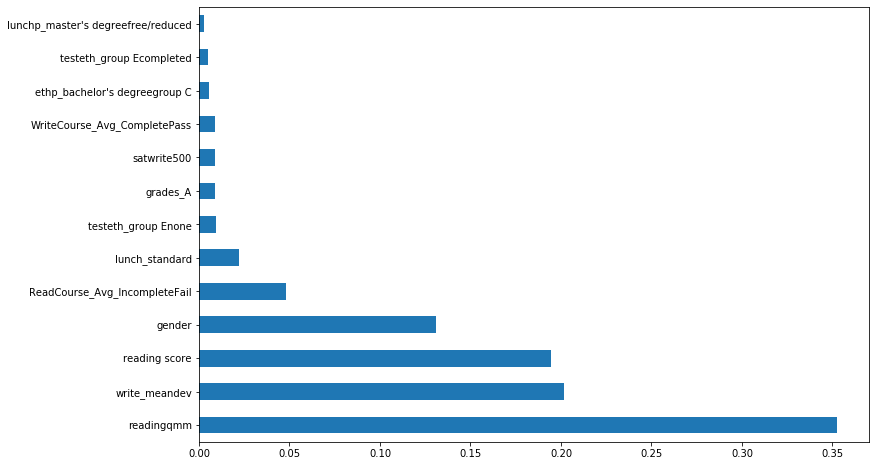

In [382]:
plt.figure(figsize=(12,8))
impft = pd.Series(model.feature_importances_, index=x.columns)
impft.nlargest(20).plot(kind='barh')
plt.show()

In [383]:
x = sm.add_constant(x) 
result = sm.OLS(y,x).fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     405.5
Date:                Mon, 01 Mar 2021   Prob (F-statistic):          3.24e-311
Time:                        19:10:56   Log-Likelihood:                -2133.0
No. Observations:                 699   AIC:                             4294.
Df Residuals:                     685   BIC:                             4358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [174]:
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)

                               feature        VIF
0                                const  36.240654
1                        write_meandev   9.614444
2                               gender   1.166395
3                           readingqmm   9.386108
4   lunchp_master's degreefree/reduced   1.068877
5        ReadCourse_Avg_IncompleteFail   2.294028
6                       lunch_standard   1.159259
7                          satwrite500   1.229393
8             testeth_group Ecompleted   1.144041
9                  testeth_group Enone   1.072220
10       ethp_bachelor's degreegroup C   1.027682
11                            grades_A   1.355518
12        WriteCourse_Avg_CompletePass   1.577755


In [175]:
x.drop('const', axis = 1 , inplace = True)

In [176]:
reg = LinearRegression()

In [339]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [340]:
model = reg.fit(x_train,y_train)

In [341]:
y_pred_reg = reg.predict(x_test)
from sklearn.metrics import r2_score
score_reg = r2_score(y_test,y_pred_reg)
score_reg

0.9176874021818694

In [238]:
rmse_lin = r(mse(y_test, y_pred_reg))
print('RMSE Lin:', rmse_lin)

RMSE Lin: 4.62730604570098


In [239]:
from sklearn.linear_model import Ridge

mod_rid = Ridge(alpha=1.0, random_state=42)
mod_rid.fit(x_train, y_train)

Ridge(random_state=42)

In [240]:
ypred_rid = mod_rid.predict(x_test)

In [241]:
rmse_rid = r(mse(y_test, ypred_rid))
print('RMSE Rid:', rmse_rid)

RMSE Rid: 4.675053576346026


In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [185]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear', 'sigmoid']}

In [186]:
#grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
#grid.fit(x_train,y_train)

In [187]:
#print(grid.best_estimator_)

In [188]:
#SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
#    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [189]:
#regressor = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
#    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#regressor.fit(x_train, y_train)

In [190]:
from sklearn.linear_model import BayesianRidge

mod_brid = BayesianRidge()
mod_brid.fit(x_train, y_train)

BayesianRidge()

In [191]:
ypred_brid = mod_brid.predict(x_test)

In [192]:
rmse_brid = r(mse(y_test, ypred_brid))
print('RMSE Bayesian Ridge:', rmse_brid)

RMSE Bayesian Ridge: 5.296198352451528


In [193]:
test.head()

,Unnamed: 0,gender,ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,gender_lunch,eth_lunch,...,readingmm,write_boxcox,Log_read,read_boxcox,readingq,readingqmm,writingq,readingqmmrank,writingmax,wnew
0,0,female,group C,some college,standard,none,67,72,femalestandard,standardgroup C,...,0.602410,392.770367,4.219508,347.077485,0.449833,0.449833,0.593645,132.0,0.593645,0.593645
1,1,male,group E,some college,standard,none,60,59,malestandard,standardgroup E,...,0.518072,293.379751,4.110874,295.441636,0.287625,0.287625,0.279264,85.0,0.279264,0.279264
2,2,female,group C,bachelor's degree,standard,none,93,95,femalestandard,standardgroup C,...,0.915663,590.192400,4.543295,560.804193,0.976589,0.976589,0.979933,293.0,0.979933,0.979933
3,3,male,group D,associate's degree,standard,none,48,46,malestandard,standardgroup D,...,0.373494,203.954655,3.891820,213.466202,0.088629,0.088629,0.090301,26.0,0.090301,0.090301
4,4,female,group B,associate's degree,standard,none,76,80,femalestandard,standardgroup B,...,0.710843,458.457234,4.343805,417.293115,0.692308,0.692308,0.807692,205.0,0.807692,0.807692


In [194]:
test['avg'] = (test['reading score']+test['writing score'])/2

In [195]:
test['avg'].min()

13.5

In [196]:
test['avg'].max()

100.0

In [197]:
test['avg score_bins'] = pd.cut(test['avg'], avg_bin)

In [198]:
test['read_meandev'] = test['reading score'] - test['reading score'].mean()

In [199]:
test['write_meandev'] = test['writing score'] - test['writing score'].mean()

In [200]:
test['readrank'] = test[['reading score']].rank(method = 'first')
test['avgrank'] = test[['avg']].rank(method = 'first')

In [201]:
test['grades'] = test['avg'].apply(lambda x : define_grades(x))

In [202]:
test['Reading_AvgStatus'] = np.where(test['reading score']<= test['reading score'].mean(), 'F', 'P')

In [203]:
test['Writing_AvgStatus'] = np.where(test['writing score']<= test['writing score'].mean(), 'F', 'P')

In [204]:
test['OverAll_PassStatus'] = test.apply(lambda x : 'F' if x['Reading_AvgStatus'] == 'F' or x['Writing_AvgStatus'] == 'F' else 'P', axis =1)

In [205]:
test['ReadCourse_Avg'] = test.apply(lambda x : 'CompleteFail' if x['Reading_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Reading_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [206]:
test['WriteCourse_Avg'] = test.apply(lambda x : 'CompleteFail' if x['Writing_AvgStatus'] == 'F' and  x['test preparation course'] == 'completed' else ( 'CompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'completed' else ('IncompletePass' if x['Writing_AvgStatus'] == 'P' and  x['test preparation course'] == 'none' else 'IncompleteFail')) , axis =1)

In [207]:
test['Log_read_rank'] = test[['Log_read']].rank(method = 'first')
test['read_boxcox_rank'] = test[['read_boxcox']].rank(method = 'first')

In [208]:
test['test preparation course']= label_encoder.fit_transform(test['test preparation course']) 
test['gender']= label_encoder.fit_transform(test['gender'])
test['OverAll_PassStatus']= label_encoder.fit_transform(test['OverAll_PassStatus']) 

In [209]:
test = pd.get_dummies(test, columns=['ethnicity', 'parental level of education','write score_bins','reading score_bins','Reading_AvgStatus','Writing_AvgStatus','grades','ReadCourse_Avg','WriteCourse_Avg','lunch'], drop_first=True)

In [210]:
test = pd.get_dummies(test, columns=['gen_test','geneth','genp','testeth','ethp','lunchp','testp'], drop_first=True)

In [211]:
test = pd.get_dummies(test, columns=['satwrite_bins','satread_bins'], drop_first=True)

In [212]:
test['reading score x writing score'] = test['reading score']*test['writing score']

In [213]:
test['writing score ^2'] = test['writing score']*test['writing score']

In [214]:
test1 = test[[ 'write_meandev','gender','readingqmm',
        "lunchp_master's degreefree/reduced",
       'ReadCourse_Avg_IncompleteFail', 'lunch_standard','satread_bins_(450, 500]',
           'testeth_group Ecompleted', 'testeth_group Enone', 
            "ethp_bachelor's degreegroup C",  
            'grades_A',  'WriteCourse_Avg_CompletePass']]

In [215]:
test1 = test1.rename(columns={'satread_bins_(450, 500]': 'satwrite500', 'satwrite_bins_(500, 600]': 'satwrite600','satwrite_bins_(600, 700]': 'satwrite700'})

In [342]:
op = reg.predict(test1)

In [343]:
#y_pred = regressor.predict(test1)

In [344]:
op.mean()

66.51800927826741

In [345]:
import xgboost as xg 
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123)  
xgb_r.fit(x_train,y_train) 

[17:32:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [346]:
op2 = xgb_r.predict(test1)

In [347]:
op2.mean()

64.21096

In [348]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(
    n_estimators = 200,
    loss_function = 'MAE',
    eval_metric = 'RMSE' )

In [349]:
cat.fit( x_train, y_train )

0:	learn: 14.1021403	total: 1.71ms	remaining: 341ms
1:	learn: 13.8161345	total: 3.27ms	remaining: 324ms
2:	learn: 13.5472187	total: 4.13ms	remaining: 271ms
3:	learn: 13.2952125	total: 5.16ms	remaining: 253ms
4:	learn: 13.0451864	total: 6.61ms	remaining: 258ms
5:	learn: 12.7971131	total: 8.05ms	remaining: 260ms
6:	learn: 12.5344777	total: 9.47ms	remaining: 261ms
7:	learn: 12.3099723	total: 10.9ms	remaining: 263ms
8:	learn: 12.0732486	total: 12.5ms	remaining: 265ms
9:	learn: 11.8773878	total: 14ms	remaining: 266ms
10:	learn: 11.6509634	total: 15.9ms	remaining: 273ms
11:	learn: 11.4216169	total: 17.4ms	remaining: 273ms
12:	learn: 11.2209434	total: 19ms	remaining: 273ms
13:	learn: 11.0077358	total: 20.4ms	remaining: 271ms
14:	learn: 10.8026820	total: 21.9ms	remaining: 270ms
15:	learn: 10.6152864	total: 23.3ms	remaining: 268ms
16:	learn: 10.4540663	total: 24.8ms	remaining: 267ms
17:	learn: 10.2797853	total: 26.1ms	remaining: 264ms
18:	learn: 10.1252702	total: 27.7ms	remaining: 264ms
19:	lea

In [350]:
op3 = cat.predict(test1)

In [357]:
op.mean()

66.51800927826741

In [358]:
op2.mean()

64.21096

In [351]:
op3.mean()

66.31509635755894

In [359]:
op12 = (op+op2)/2

In [360]:
op23 = (op2+op3)/2

In [361]:
op12.mean()

65.36448682004699

In [362]:
op23.mean()

65.26303035969276

In [363]:
op4 = np.floor(op)
op5 = np.floor(op2)
op6 = np.floor(op3)

In [365]:
op45 = (op4+op5)/2
op56 = (op5+op6)/2

In [366]:
op45.mean()

64.85

In [367]:
op56.mean()

64.73833333333333

In [372]:
opf = (op12+op23+op45+op56)/4

In [373]:
opf.mean()

64.79416666666667

In [378]:
opf

array([63.  , 69.25, 83.5 , 51.5 , 69.  , 85.5 , 64.  , 66.75, 82.75,
       66.25, 81.75, 60.75, 57.25, 90.5 , 45.25, 60.25, 68.25, 76.75,
       56.  , 56.25, 72.25, 81.  , 72.  , 72.5 , 49.75, 43.75, 29.5 ,
       48.5 , 52.75, 36.75, 50.  , 56.25, 72.25, 50.75, 75.25, 67.5 ,
       72.75, 65.  , 68.5 , 69.25, 62.25, 47.75, 60.5 , 54.  , 50.75,
       81.5 , 52.5 , 67.  , 72.25, 54.5 , 51.25, 68.25, 73.  , 89.25,
       74.75, 69.25, 57.25, 63.25, 83.  , 87.25, 76.25, 69.25, 73.  ,
       50.  , 82.  , 57.5 , 60.75, 85.25, 56.75, 65.25, 73.  , 53.  ,
       69.25, 46.5 , 65.25, 62.75, 67.25, 82.25, 48.25, 58.  , 66.5 ,
       66.5 , 66.5 , 77.  , 57.  , 45.75, 51.  , 77.5 , 69.  , 65.25,
       85.75, 82.75, 77.5 , 78.  , 83.5 , 28.5 , 58.5 , 55.  , 40.  ,
       83.75, 71.  , 52.  , 65.25, 70.75, 73.  , 70.5 , 72.25, 46.75,
       70.75, 46.75, 63.  , 42.5 , 72.5 , 64.5 , 45.75, 89.5 , 68.25,
       63.  , 60.5 , 57.5 , 62.25, 50.25, 44.25, 75.25, 79.  , 68.75,
       65.25, 56.75,

In [375]:
submission = pd.DataFrame({'idx': test.index, 'math_score': opf})
submission.to_csv('outputop.csv', index=False)